In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# 2
from sklearn.mixture import GaussianMixture

In [3]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
    plt.show()

In [4]:
# elbow method
from scipy.spatial.distance import cdist

def elbow_report(X):
    meandist = []
    n_clusters = range(2, 15)
    for n_cluster in n_clusters:
        gmm = GaussianMixture(n_components=n_cluster, random_state=0)
        gmm.fit(X)
        meandist.append(
          sum(
            np.min(
              cdist(X, gmm.means_, 'mahalanobis', VI=gmm.precisions_), 
              axis=1
            ) / X.shape[0]
          )
        )
    plt.plot(n_clusters, meandist,'bx-')
    plt.xlabel('Number of Clusters') 
    plt.show()

from sklearn.metrics import silhouette_score

def silhouette(X):
    scores = []
    n_clusters = range(2, 15)
    for n_cluster in n_clusters:
      gmm = GaussianMixture(n_components=n_cluster, random_state=0)
      gmm.fit(X)
      labels = gmm.predict(X)
      score = silhouette_score(X, labels)
      scores.append(score)

    plt.plot(n_clusters, scores, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

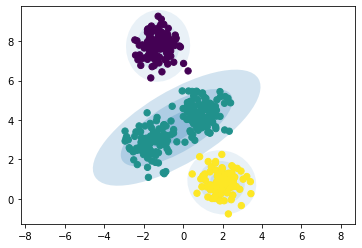

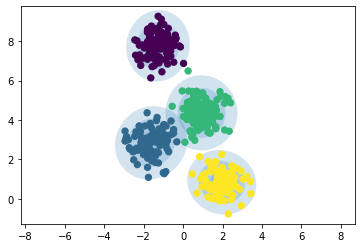

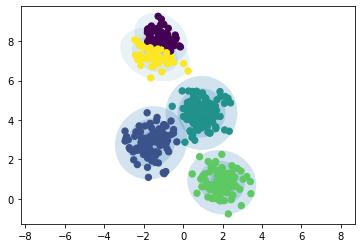

In [5]:
# toy dataset 1
from sklearn.datasets import make_blobs
X1, Y1 = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)

for i in range (3, 6):
  gmm = GaussianMixture(n_components=i, random_state=0)
  plot_gmm(gmm, X1)

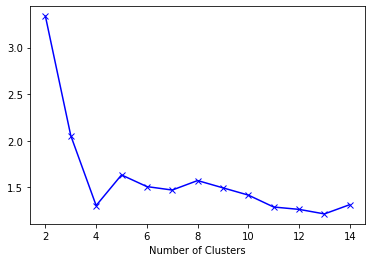

In [6]:
elbow_report(X1)

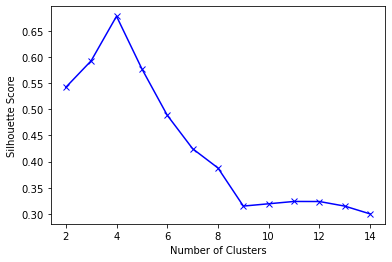

In [7]:
silhouette(X1)

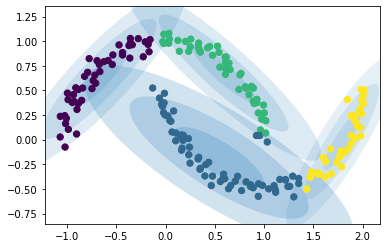

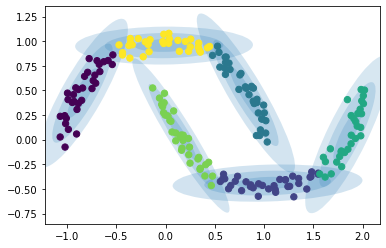

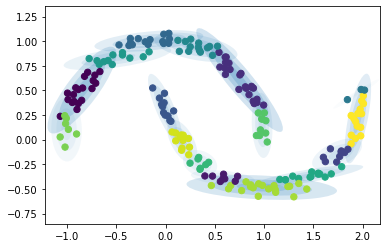

In [8]:
# toy dataset 2
from sklearn.datasets import make_moons
X2, Y2 = make_moons(200, noise=.05, random_state=0)

for i in [4, 6, 16]:
  gmm = GaussianMixture(n_components=i, random_state=0)
  plot_gmm(gmm, X2)

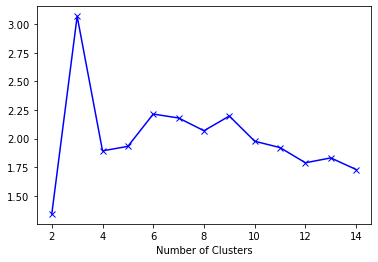

In [10]:
elbow_report(X2)

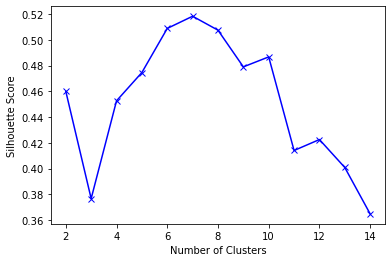

In [11]:
silhouette(X2)

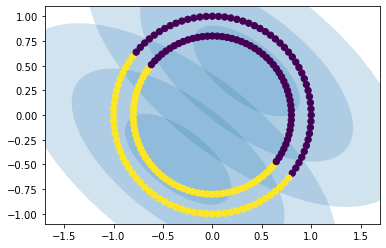

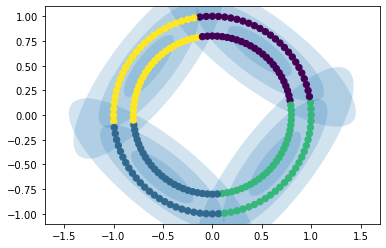

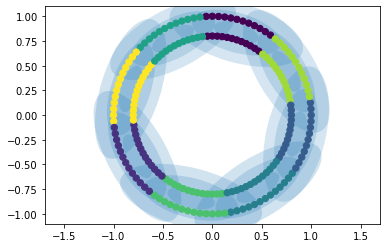

In [12]:
# toy dataset 3
from sklearn.datasets import make_circles
X3, Y3 = make_circles(200, random_state=42)

for i in [2, 4, 8]:
  gmm = GaussianMixture(n_components=i, random_state=0)
  plot_gmm(gmm, X3)

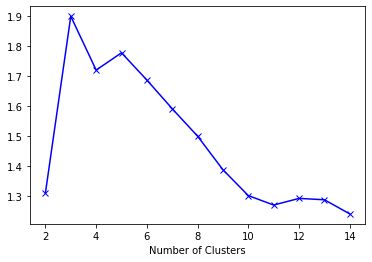

In [13]:
elbow_report(X3)

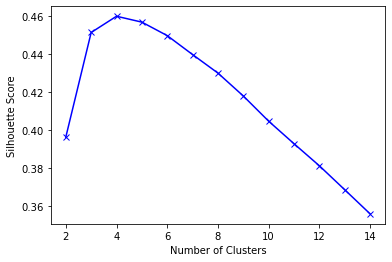

In [14]:
silhouette(X3)